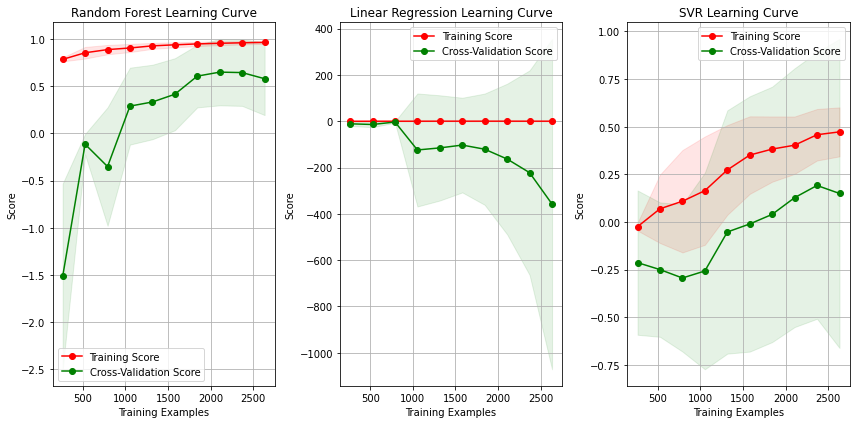

Evaluation Metrics:
Model: Random Forest
R-squared score: 0.9647
Mean Squared Error: 161.6465

Model: Linear Regression
R-squared score: 0.3024
Mean Squared Error: 3195.9485

Model: SVR
R-squared score: 0.4891
Mean Squared Error: 2340.4802



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Load the data
sunspot_data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)

# Preprocess the data
sunspot_data.columns = ['Year', 'Month', 'Date', 'Sunspot Number', 'Standard Deviation', 'Number of Observations', 'Definitive/Provisional Indicator']
sunspot_data['Sunspot Number'] = sunspot_data['Sunspot Number'].astype(str)  # Convert to string
sunspot_data['Sunspot Number'] = sunspot_data['Sunspot Number'].str.replace(' -1', 'NaN').astype(float)
sunspot_data = sunspot_data.dropna()
sunspot_data = sunspot_data.reset_index(drop=True)


# Select features and target variable
X = sunspot_data[['Year', 'Standard Deviation', 'Number of Observations', 'Definitive/Provisional Indicator']].values
y = sunspot_data['Sunspot Number'].values


# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Define the models
rf = RandomForestRegressor()
lr = LinearRegression()
svr = SVR()

# Fit the models
rf.fit(X_scaled, y)
lr.fit(X_scaled, y)
svr.fit(X_scaled, y)

# Define the train_sizes for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Compute learning curves for Random Forest
train_sizes_abs, train_scores_rf, test_scores_rf, fit_times_rf, _ = learning_curve(rf, X_scaled, y, cv=5, scoring='r2', n_jobs=-1, return_times=True, train_sizes=train_sizes)

# Compute learning curves for Linear Regression
train_sizes_abs, train_scores_lr, test_scores_lr, fit_times_lr, _ = learning_curve(lr, X_scaled, y, cv=5, scoring='r2', n_jobs=-1, return_times=True, train_sizes=train_sizes)

# Compute learning curves for SVR
train_sizes_abs, train_scores_svr, test_scores_svr, fit_times_svr, _ = learning_curve(svr, X_scaled, y, cv=5, scoring='r2', n_jobs=-1, return_times=True, train_sizes=train_sizes)

# Compute mean and standard deviation for training scores, test scores, and fit times for Random Forest
train_scores_mean_rf = np.mean(train_scores_rf, axis=1)
train_scores_std_rf = np.std(train_scores_rf, axis=1)
test_scores_mean_rf = np.mean(test_scores_rf, axis=1)
test_scores_std_rf = np.std(test_scores_rf, axis=1)
fit_times_mean_rf = np.mean(fit_times_rf, axis=1)
fit_times_std_rf = np.std(fit_times_rf, axis=1)

# Compute mean and standard deviation for training scores, test scores, and fit times for Linear Regression
train_scores_mean_lr = np.mean(train_scores_lr, axis=1)
train_scores_std_lr = np.std(train_scores_lr, axis=1)
test_scores_mean_lr = np.mean(test_scores_lr, axis=1)
test_scores_std_lr = np.std(test_scores_lr, axis=1)
fit_times_mean_lr = np.mean(fit_times_lr, axis=1)
fit_times_std_lr = np.std(fit_times_lr, axis=1)

# Compute mean and standard deviation for training scores, test scores, and fit times for SVR
train_scores_mean_svr = np.mean(train_scores_svr, axis=1)
train_scores_std_svr = np.std(train_scores_svr, axis=1)
test_scores_mean_svr = np.mean(test_scores_svr, axis=1)
test_scores_std_svr = np.std(test_scores_svr, axis=1)
fit_times_mean_svr = np.mean(fit_times_svr, axis=1)
fit_times_std_svr = np.std(fit_times_svr, axis=1)

# Plot the learning curves
plt.figure(figsize=(12, 6))

# Plot learning curve for Random Forest
plt.subplot(1, 3, 1)
plt.plot(train_sizes_abs, train_scores_mean_rf, 'o-', color='r', label='Training Score')
plt.plot(train_sizes_abs, test_scores_mean_rf, 'o-', color='g', label='Cross-Validation Score')
plt.fill_between(train_sizes_abs, train_scores_mean_rf - train_scores_std_rf, train_scores_mean_rf + train_scores_std_rf, alpha=0.1, color='r')
plt.fill_between(train_sizes_abs, test_scores_mean_rf - test_scores_std_rf, test_scores_mean_rf + test_scores_std_rf, alpha=0.1, color='g')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Random Forest Learning Curve')
plt.legend(loc='best')
plt.grid(True)

# Plot learning curve for Linear Regression
plt.subplot(1, 3, 2)
plt.plot(train_sizes_abs, train_scores_mean_lr, 'o-', color='r', label='Training Score')
plt.plot(train_sizes_abs, test_scores_mean_lr, 'o-', color='g', label='Cross-Validation Score')
plt.fill_between(train_sizes_abs, train_scores_mean_lr - train_scores_std_lr, train_scores_mean_lr + train_scores_std_lr, alpha=0.1, color='r')
plt.fill_between(train_sizes_abs, test_scores_mean_lr - test_scores_std_lr, test_scores_mean_lr + test_scores_std_lr, alpha=0.1, color='g')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Linear Regression Learning Curve')
plt.legend(loc='best')
plt.grid(True)

# Plot learning curve for SVR
plt.subplot(1, 3, 3)
plt.plot(train_sizes_abs, train_scores_mean_svr, 'o-', color='r', label='Training Score')
plt.plot(train_sizes_abs, test_scores_mean_svr, 'o-', color='g', label='Cross-Validation Score')
plt.fill_between(train_sizes_abs, train_scores_mean_svr - train_scores_std_svr, train_scores_mean_svr + train_scores_std_svr, alpha=0.1, color='r')
plt.fill_between(train_sizes_abs, test_scores_mean_svr - test_scores_std_svr, test_scores_mean_svr + test_scores_std_svr, alpha=0.1, color='g')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('SVR Learning Curve')
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Print evaluation metrics
models = ['Random Forest', 'Linear Regression', 'SVR']
r2_scores = [r2_score(y, rf.predict(X_scaled)), r2_score(y, lr.predict(X_scaled)), r2_score(y, svr.predict(X_scaled))]
mse_scores = [mean_squared_error(y, rf.predict(X_scaled)), mean_squared_error(y, lr.predict(X_scaled)), mean_squared_error(y, svr.predict(X_scaled))]

print('Evaluation Metrics:')
for i in range(len(models)):
    print('Model: {}'.format(models[i]))
    print('R-squared score: {:.4f}'.format(r2_scores[i]))
    print('Mean Squared Error: {:.4f}'.format(mse_scores[i]))
    print()


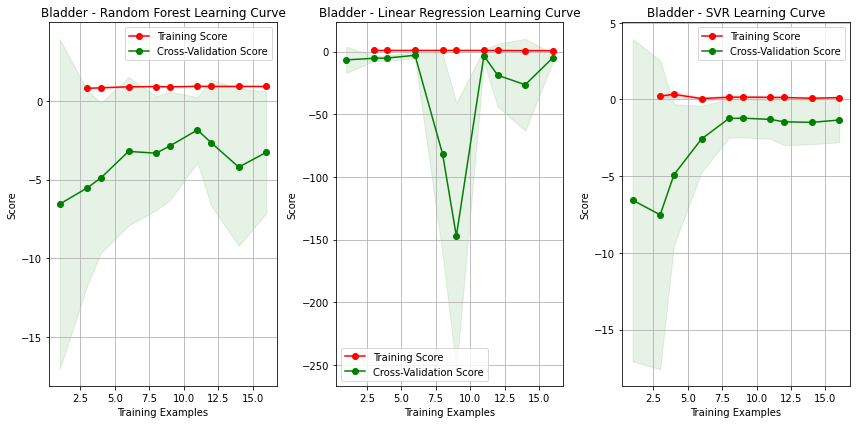

Evaluation Metrics for Bladder:
Model: Random Forest
R-squared score: 0.9050
Mean Squared Error: 11.1593

Model: Linear Regression
R-squared score: 0.6747
Mean Squared Error: 38.2102

Model: SVR
R-squared score: 0.1180
Mean Squared Error: 103.6016



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Load the data
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Preprocess the data
target_cancer = 'Bladder'
features = [col for col in data.columns if col != target_cancer]
X = data[features].values
y = data[target_cancer].values

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Define the models
rf = RandomForestRegressor()
lr = LinearRegression()
svr = SVR()

# Fit the models
rf.fit(X_scaled, y)
lr.fit(X_scaled, y)
svr.fit(X_scaled, y)

# Define the train_sizes for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Compute learning curves for Random Forest
train_sizes_abs, train_scores_rf, test_scores_rf, fit_times_rf, _ = learning_curve(rf, X_scaled, y, cv=5, scoring='r2', n_jobs=-1, return_times=True, train_sizes=train_sizes)

# Compute learning curves for Linear Regression
train_sizes_abs, train_scores_lr, test_scores_lr, fit_times_lr, _ = learning_curve(lr, X_scaled, y, cv=5, scoring='r2', n_jobs=-1, return_times=True, train_sizes=train_sizes)

# Compute learning curves for SVR
train_sizes_abs, train_scores_svr, test_scores_svr, fit_times_svr, _ = learning_curve(svr, X_scaled, y, cv=5, scoring='r2', n_jobs=-1, return_times=True, train_sizes=train_sizes)

# Compute mean and standard deviation for training scores, test scores, and fit times for Random Forest
train_scores_mean_rf = np.mean(train_scores_rf, axis=1)
train_scores_std_rf = np.std(train_scores_rf, axis=1)
test_scores_mean_rf = np.mean(test_scores_rf, axis=1)
test_scores_std_rf = np.std(test_scores_rf, axis=1)
fit_times_mean_rf = np.mean(fit_times_rf, axis=1)
fit_times_std_rf = np.std(fit_times_rf, axis=1)

# Compute mean and standard deviation for training scores, test scores, and fit times for Linear Regression
train_scores_mean_lr = np.mean(train_scores_lr, axis=1)
train_scores_std_lr = np.std(train_scores_lr, axis=1)
test_scores_mean_lr = np.mean(test_scores_lr, axis=1)
test_scores_std_lr = np.std(test_scores_lr, axis=1)
fit_times_mean_lr = np.mean(fit_times_lr, axis=1)
fit_times_std_lr = np.std(fit_times_lr, axis=1)

# Compute mean and standard deviation for training scores, test scores, and fit times for SVR
train_scores_mean_svr = np.mean(train_scores_svr, axis=1)
train_scores_std_svr = np.std(train_scores_svr, axis=1)
test_scores_mean_svr = np.mean(test_scores_svr, axis=1)
test_scores_std_svr = np.std(test_scores_svr, axis=1)
fit_times_mean_svr = np.mean(fit_times_svr, axis=1)
fit_times_std_svr = np.std(fit_times_svr, axis=1)

# Plot the learning curves
plt.figure(figsize=(12, 6))

# Plot learning curve for Random Forest
plt.subplot(1, 3, 1)
plt.plot(train_sizes_abs, train_scores_mean_rf, 'o-', color='r', label='Training Score')
plt.plot(train_sizes_abs, test_scores_mean_rf, 'o-', color='g', label='Cross-Validation Score')
plt.fill_between(train_sizes_abs, train_scores_mean_rf - train_scores_std_rf, train_scores_mean_rf + train_scores_std_rf, alpha=0.1, color='r')
plt.fill_between(train_sizes_abs, test_scores_mean_rf - test_scores_std_rf, test_scores_mean_rf + test_scores_std_rf, alpha=0.1, color='g')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title(f'{target_cancer} - Random Forest Learning Curve')
plt.legend(loc='best')
plt.grid(True)

# Plot learning curve for Linear Regression
plt.subplot(1, 3, 2)
plt.plot(train_sizes_abs, train_scores_mean_lr, 'o-', color='r', label='Training Score')
plt.plot(train_sizes_abs, test_scores_mean_lr, 'o-', color='g', label='Cross-Validation Score')
plt.fill_between(train_sizes_abs, train_scores_mean_lr - train_scores_std_lr, train_scores_mean_lr + train_scores_std_lr, alpha=0.1, color='r')
plt.fill_between(train_sizes_abs, test_scores_mean_lr - test_scores_std_lr, test_scores_mean_lr + test_scores_std_lr, alpha=0.1, color='g')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title(f'{target_cancer} - Linear Regression Learning Curve')
plt.legend(loc='best')
plt.grid(True)

# Plot learning curve for SVR
plt.subplot(1, 3, 3)
plt.plot(train_sizes_abs, train_scores_mean_svr, 'o-', color='r', label='Training Score')
plt.plot(train_sizes_abs, test_scores_mean_svr, 'o-', color='g', label='Cross-Validation Score')
plt.fill_between(train_sizes_abs, train_scores_mean_svr - train_scores_std_svr, train_scores_mean_svr + train_scores_std_svr, alpha=0.1, color='r')
plt.fill_between(train_sizes_abs, test_scores_mean_svr - test_scores_std_svr, test_scores_mean_svr + test_scores_std_svr, alpha=0.1, color='g')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title(f'{target_cancer} - SVR Learning Curve')
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Print evaluation metrics
models = ['Random Forest', 'Linear Regression', 'SVR']
r2_scores = [r2_score(y, rf.predict(X_scaled)), r2_score(y, lr.predict(X_scaled)), r2_score(y, svr.predict(X_scaled))]
mse_scores = [mean_squared_error(y, rf.predict(X_scaled)), mean_squared_error(y, lr.predict(X_scaled)), mean_squared_error(y, svr.predict(X_scaled))]

print(f'Evaluation Metrics for {target_cancer}:')
for i in range(len(models)):
    print('Model: {}'.format(models[i]))
    print('R-squared score: {:.4f}'.format(r2_scores[i]))
    print('Mean Squared Error: {:.4f}'.format(mse_scores[i]))
    print()


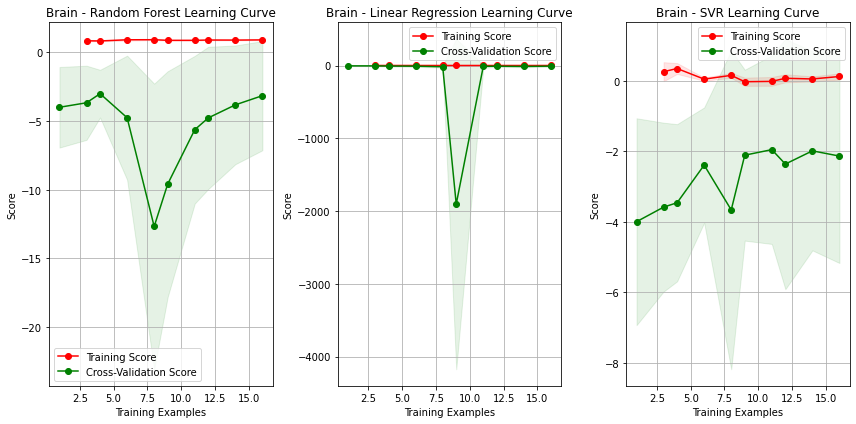

Evaluation Metrics for Brain:
Model: Random Forest
R-squared score: 0.9295
Mean Squared Error: 10.8872

Model: Linear Regression
R-squared score: 0.8763
Mean Squared Error: 19.0982

Model: SVR
R-squared score: 0.1626
Mean Squared Error: 129.3158



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Load the data
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Preprocess the data
target_cancer = 'Brain'
features = [col for col in data.columns if col != target_cancer]
X = data[features].values
y = data[target_cancer].values

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Define the models
rf = RandomForestRegressor()
lr = LinearRegression()
svr = SVR()

# Fit the models
rf.fit(X_scaled, y)
lr.fit(X_scaled, y)
svr.fit(X_scaled, y)

# Define the train_sizes for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Compute learning curves for Random Forest
train_sizes_abs, train_scores_rf, test_scores_rf, fit_times_rf, _ = learning_curve(rf, X_scaled, y, cv=5, scoring='r2', n_jobs=-1, return_times=True, train_sizes=train_sizes)

# Compute learning curves for Linear Regression
train_sizes_abs, train_scores_lr, test_scores_lr, fit_times_lr, _ = learning_curve(lr, X_scaled, y, cv=5, scoring='r2', n_jobs=-1, return_times=True, train_sizes=train_sizes)

# Compute learning curves for SVR
train_sizes_abs, train_scores_svr, test_scores_svr, fit_times_svr, _ = learning_curve(svr, X_scaled, y, cv=5, scoring='r2', n_jobs=-1, return_times=True, train_sizes=train_sizes)

# Compute mean and standard deviation for training scores, test scores, and fit times for Random Forest
train_scores_mean_rf = np.mean(train_scores_rf, axis=1)
train_scores_std_rf = np.std(train_scores_rf, axis=1)
test_scores_mean_rf = np.mean(test_scores_rf, axis=1)
test_scores_std_rf = np.std(test_scores_rf, axis=1)
fit_times_mean_rf = np.mean(fit_times_rf, axis=1)
fit_times_std_rf = np.std(fit_times_rf, axis=1)

# Compute mean and standard deviation for training scores, test scores, and fit times for Linear Regression
train_scores_mean_lr = np.mean(train_scores_lr, axis=1)
train_scores_std_lr = np.std(train_scores_lr, axis=1)
test_scores_mean_lr = np.mean(test_scores_lr, axis=1)
test_scores_std_lr = np.std(test_scores_lr, axis=1)
fit_times_mean_lr = np.mean(fit_times_lr, axis=1)
fit_times_std_lr = np.std(fit_times_lr, axis=1)

# Compute mean and standard deviation for training scores, test scores, and fit times for SVR
train_scores_mean_svr = np.mean(train_scores_svr, axis=1)
train_scores_std_svr = np.std(train_scores_svr, axis=1)
test_scores_mean_svr = np.mean(test_scores_svr, axis=1)
test_scores_std_svr = np.std(test_scores_svr, axis=1)
fit_times_mean_svr = np.mean(fit_times_svr, axis=1)
fit_times_std_svr = np.std(fit_times_svr, axis=1)

# Plot the learning curves
plt.figure(figsize=(12, 6))

# Plot learning curve for Random Forest
plt.subplot(1, 3, 1)
plt.plot(train_sizes_abs, train_scores_mean_rf, 'o-', color='r', label='Training Score')
plt.plot(train_sizes_abs, test_scores_mean_rf, 'o-', color='g', label='Cross-Validation Score')
plt.fill_between(train_sizes_abs, train_scores_mean_rf - train_scores_std_rf, train_scores_mean_rf + train_scores_std_rf, alpha=0.1, color='r')
plt.fill_between(train_sizes_abs, test_scores_mean_rf - test_scores_std_rf, test_scores_mean_rf + test_scores_std_rf, alpha=0.1, color='g')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title(f'{target_cancer} - Random Forest Learning Curve')
plt.legend(loc='best')
plt.grid(True)

# Plot learning curve for Linear Regression
plt.subplot(1, 3, 2)
plt.plot(train_sizes_abs, train_scores_mean_lr, 'o-', color='r', label='Training Score')
plt.plot(train_sizes_abs, test_scores_mean_lr, 'o-', color='g', label='Cross-Validation Score')
plt.fill_between(train_sizes_abs, train_scores_mean_lr - train_scores_std_lr, train_scores_mean_lr + train_scores_std_lr, alpha=0.1, color='r')
plt.fill_between(train_sizes_abs, test_scores_mean_lr - test_scores_std_lr, test_scores_mean_lr + test_scores_std_lr, alpha=0.1, color='g')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title(f'{target_cancer} - Linear Regression Learning Curve')
plt.legend(loc='best')
plt.grid(True)

# Plot learning curve for SVR
plt.subplot(1, 3, 3)
plt.plot(train_sizes_abs, train_scores_mean_svr, 'o-', color='r', label='Training Score')
plt.plot(train_sizes_abs, test_scores_mean_svr, 'o-', color='g', label='Cross-Validation Score')
plt.fill_between(train_sizes_abs, train_scores_mean_svr - train_scores_std_svr, train_scores_mean_svr + train_scores_std_svr, alpha=0.1, color='r')
plt.fill_between(train_sizes_abs, test_scores_mean_svr - test_scores_std_svr, test_scores_mean_svr + test_scores_std_svr, alpha=0.1, color='g')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title(f'{target_cancer} - SVR Learning Curve')
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Print evaluation metrics
models = ['Random Forest', 'Linear Regression', 'SVR']
r2_scores = [r2_score(y, rf.predict(X_scaled)), r2_score(y, lr.predict(X_scaled)), r2_score(y, svr.predict(X_scaled))]
mse_scores = [mean_squared_error(y, rf.predict(X_scaled)), mean_squared_error(y, lr.predict(X_scaled)), mean_squared_error(y, svr.predict(X_scaled))]

print(f'Evaluation Metrics for {target_cancer}:')
for i in range(len(models)):
    print('Model: {}'.format(models[i]))
    print('R-squared score: {:.4f}'.format(r2_scores[i]))
    print('Mean Squared Error: {:.4f}'.format(mse_scores[i]))
    print()


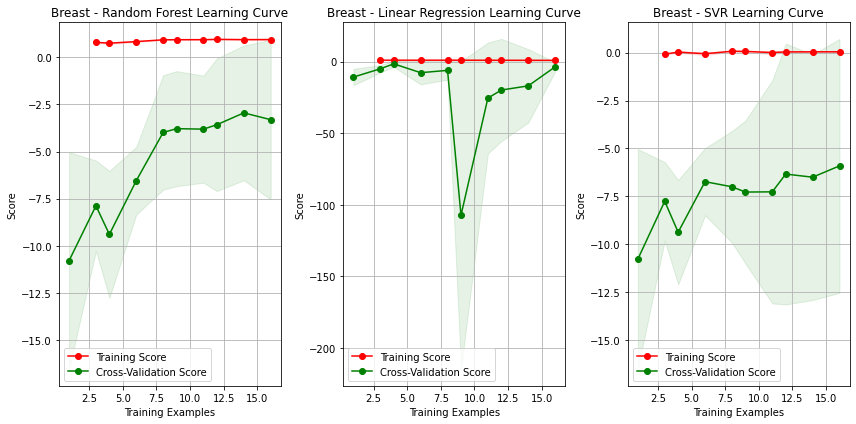

Evaluation Metrics for Breast:
Model: Random Forest
R-squared score: 0.9253
Mean Squared Error: 176.1093

Model: Linear Regression
R-squared score: 0.8559
Mean Squared Error: 339.4105

Model: SVR
R-squared score: 0.0678
Mean Squared Error: 2196.3923



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Load the data
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Preprocess the data
target_cancer = 'Breast'
features = [col for col in data.columns if col != target_cancer]
X = data[features].values
y = data[target_cancer].values

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Define the models
rf = RandomForestRegressor()
lr = LinearRegression()
svr = SVR()

# Fit the models
rf.fit(X_scaled, y)
lr.fit(X_scaled, y)
svr.fit(X_scaled, y)

# Define the train_sizes for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Compute learning curves for Random Forest
train_sizes_abs, train_scores_rf, test_scores_rf, fit_times_rf, _ = learning_curve(rf, X_scaled, y, cv=5, scoring='r2', n_jobs=-1, return_times=True, train_sizes=train_sizes)

# Compute learning curves for Linear Regression
train_sizes_abs, train_scores_lr, test_scores_lr, fit_times_lr, _ = learning_curve(lr, X_scaled, y, cv=5, scoring='r2', n_jobs=-1, return_times=True, train_sizes=train_sizes)

# Compute learning curves for SVR
train_sizes_abs, train_scores_svr, test_scores_svr, fit_times_svr, _ = learning_curve(svr, X_scaled, y, cv=5, scoring='r2', n_jobs=-1, return_times=True, train_sizes=train_sizes)

# Compute mean and standard deviation for training scores, test scores, and fit times for Random Forest
train_scores_mean_rf = np.mean(train_scores_rf, axis=1)
train_scores_std_rf = np.std(train_scores_rf, axis=1)
test_scores_mean_rf = np.mean(test_scores_rf, axis=1)
test_scores_std_rf = np.std(test_scores_rf, axis=1)
fit_times_mean_rf = np.mean(fit_times_rf, axis=1)
fit_times_std_rf = np.std(fit_times_rf, axis=1)

# Compute mean and standard deviation for training scores, test scores, and fit times for Linear Regression
train_scores_mean_lr = np.mean(train_scores_lr, axis=1)
train_scores_std_lr = np.std(train_scores_lr, axis=1)
test_scores_mean_lr = np.mean(test_scores_lr, axis=1)
test_scores_std_lr = np.std(test_scores_lr, axis=1)
fit_times_mean_lr = np.mean(fit_times_lr, axis=1)
fit_times_std_lr = np.std(fit_times_lr, axis=1)

# Compute mean and standard deviation for training scores, test scores, and fit times for SVR
train_scores_mean_svr = np.mean(train_scores_svr, axis=1)
train_scores_std_svr = np.std(train_scores_svr, axis=1)
test_scores_mean_svr = np.mean(test_scores_svr, axis=1)
test_scores_std_svr = np.std(test_scores_svr, axis=1)
fit_times_mean_svr = np.mean(fit_times_svr, axis=1)
fit_times_std_svr = np.std(fit_times_svr, axis=1)

# Plot the learning curves
plt.figure(figsize=(12, 6))

# Plot learning curve for Random Forest
plt.subplot(1, 3, 1)
plt.plot(train_sizes_abs, train_scores_mean_rf, 'o-', color='r', label='Training Score')
plt.plot(train_sizes_abs, test_scores_mean_rf, 'o-', color='g', label='Cross-Validation Score')
plt.fill_between(train_sizes_abs, train_scores_mean_rf - train_scores_std_rf, train_scores_mean_rf + train_scores_std_rf, alpha=0.1, color='r')
plt.fill_between(train_sizes_abs, test_scores_mean_rf - test_scores_std_rf, test_scores_mean_rf + test_scores_std_rf, alpha=0.1, color='g')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title(f'{target_cancer} - Random Forest Learning Curve')
plt.legend(loc='best')
plt.grid(True)

# Plot learning curve for Linear Regression
plt.subplot(1, 3, 2)
plt.plot(train_sizes_abs, train_scores_mean_lr, 'o-', color='r', label='Training Score')
plt.plot(train_sizes_abs, test_scores_mean_lr, 'o-', color='g', label='Cross-Validation Score')
plt.fill_between(train_sizes_abs, train_scores_mean_lr - train_scores_std_lr, train_scores_mean_lr + train_scores_std_lr, alpha=0.1, color='r')
plt.fill_between(train_sizes_abs, test_scores_mean_lr - test_scores_std_lr, test_scores_mean_lr + test_scores_std_lr, alpha=0.1, color='g')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title(f'{target_cancer} - Linear Regression Learning Curve')
plt.legend(loc='best')
plt.grid(True)

# Plot learning curve for SVR
plt.subplot(1, 3, 3)
plt.plot(train_sizes_abs, train_scores_mean_svr, 'o-', color='r', label='Training Score')
plt.plot(train_sizes_abs, test_scores_mean_svr, 'o-', color='g', label='Cross-Validation Score')
plt.fill_between(train_sizes_abs, train_scores_mean_svr - train_scores_std_svr, train_scores_mean_svr + train_scores_std_svr, alpha=0.1, color='r')
plt.fill_between(train_sizes_abs, test_scores_mean_svr - test_scores_std_svr, test_scores_mean_svr + test_scores_std_svr, alpha=0.1, color='g')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title(f'{target_cancer} - SVR Learning Curve')
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Print evaluation metrics
models = ['Random Forest', 'Linear Regression', 'SVR']
r2_scores = [r2_score(y, rf.predict(X_scaled)), r2_score(y, lr.predict(X_scaled)), r2_score(y, svr.predict(X_scaled))]
mse_scores = [mean_squared_error(y, rf.predict(X_scaled)), mean_squared_error(y, lr.predict(X_scaled)), mean_squared_error(y, svr.predict(X_scaled))]

print(f'Evaluation Metrics for {target_cancer}:')
for i in range(len(models)):
    print('Model: {}'.format(models[i]))
    print('R-squared score: {:.4f}'.format(r2_scores[i]))
    print('Mean Squared Error: {:.4f}'.format(mse_scores[i]))
    print()
